In [27]:
!pip install numpy pandas matplotlib seaborn scikit-learn nltk gensim tensorflow keras fasttext-wheel wordcloud imbalanced-learn

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Rolling back uninstall of numpy
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy-2.0.2.dist-info\
   from C:\Users\ThinkPad\OneDrive\Documents\Miniconda\Lib\site-packages\~umpy-2.0.2.dist-info
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy\__config__.py
   from C:\Users\ThinkPad\AppData\Local\Temp\pip-uninstall-72eu2vee\__config__.py
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\ThinkPad\AppData\Local\Temp\pip-uninstall-72eu2vee\__init__.cython-30.pxd
  Moving to c:\users\thinkpad\onedrive\documents\miniconda\lib\site-packages\numpy\__init__.pxd
   from C:\Users\ThinkPad\AppData\Local\Temp\pip-uninstall-72eu2vee\__init__.pxd
  Moving

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ThinkPad\\OneDrive\\Documents\\Miniconda\\Lib\\site-packages\\numpy\\core\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
!pip install tensorflow

In [29]:
import re
from collections import Counter

import pandas as pd
from tqdm.auto import tqdm
from nltk.tokenize import word_tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


In [7]:
url = 'C:/Users/ThinkPad/OneDrive/Documents/Semester 6/NLP/model/data_gabungan2.csv'
data = pd.read_csv(url, delimiter=",")
data.head()

,tweet,label_emosi
0,fajar noor merasa indah,Senang
1,fajar noor x nabila taqiyyah ku ingin pisah,Sedih
2,fajar noor jangan hilangkan dia,Sedih
3,fajar noor dia,Sedih
4,fajar noor x juicy luicy tanpa tergesa,Senang


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 914 entries, 0 to 913
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   tweet        914 non-null    object
 1   label_emosi  914 non-null    object
dtypes: object(2)
memory usage: 14.4+ KB


In [9]:
# Hapus baris yang memiliki nilai NaN di kolom 'tweet'
data = data.dropna(subset=['tweet'])

<Axes: xlabel='label_emosi'>

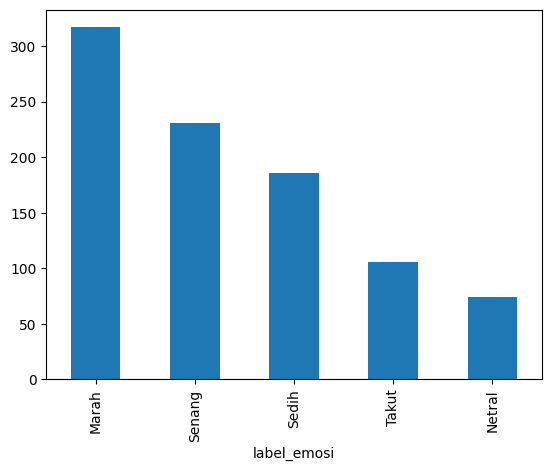

In [10]:
df = data
df['label_emosi'].value_counts().plot(kind='bar')

In [ ]:
# Inisialisasi stopword remover & stemmer
stop_factory = StopWordRemoverFactory()
stem_factory = StemmerFactory()

# Ambil stopwords bawaan lalu tambahkan kata-kata tidak penting yang sering muncul
tambahan_stopwords = [
    'yang', 'ga', 'gak', 'nggak', 'aja', 'sih', 'deh', 'dong', 'nih', 'tuh',
    'kayak', 'cuma', 'doang', 'banget', 'lah', 'kan', 'nya', 'itu', 'ini',
    'buat', 'udah', 'masa', 'malah', 'emang', 'ntar', 'dulu', 'kalo', 'biar',
    'semua', 'setiap', 'tetap', 'harus', 'akan', 'sama', 'jadi', 'yg', 'kok', 'gue',
    'udh', 'udah', 'sampe', 'emg', 'gw', 'lw', 'xiii', 'x', 'tak', 'ng', 's', 'to', 'eh',
    'dah', 'jg', 'tp', 'jd', 'tu', 'nang', 'sm', 'punya', 'ni', 'ama', 'fan', 'amp', 'jadi',
    'bgt', 'si'
]

stopwords = set(stop_factory.get_stop_words())
stopwords.update(tambahan_stopwords)

stemmer = stem_factory.create_stemmer()

# Fungsi pembersih teks
def preprocess(teks):
    if not isinstance(teks, str):
        return ''

    teks = teks.lower()
    teks = re.sub(r'[^a-z\s]', '', teks)
    tokens = teks.split()

    tokens = [t for t in tokens if t not in stopwords]
    tokens = [stemmer.stem(t) for t in tokens]

    return ' '.join(tokens)


# Hindari error akibat NaN
data['tweet'] = data['tweet'].fillna('')

# Bersihkan semua tweet → simpan ke kolom baru
data['tweet_clean'] = data['tweet'].apply(preprocess)

# Gabungkan semua teks bersih
all_text = ' '.join(data['tweet_clean'])
processed_tokens = all_text.split()

# Hitung frekuensi kata
counter = Counter(processed_tokens)

# Tampilkan 10 kata paling sering
print("🔟 Kata paling sering setelah stopword & imbuhan dihapus:")
for word, count in counter.most_common(10):
    print(f"{word}: {count}")

🔟 Kata paling sering setelah stopword & imbuhan dihapus:
fajar: 555
idol: 493
indonesian: 238
shabrina: 225
amanda: 217
noor: 176
mesa: 104
selingkuh: 95
season: 91
lagu: 75


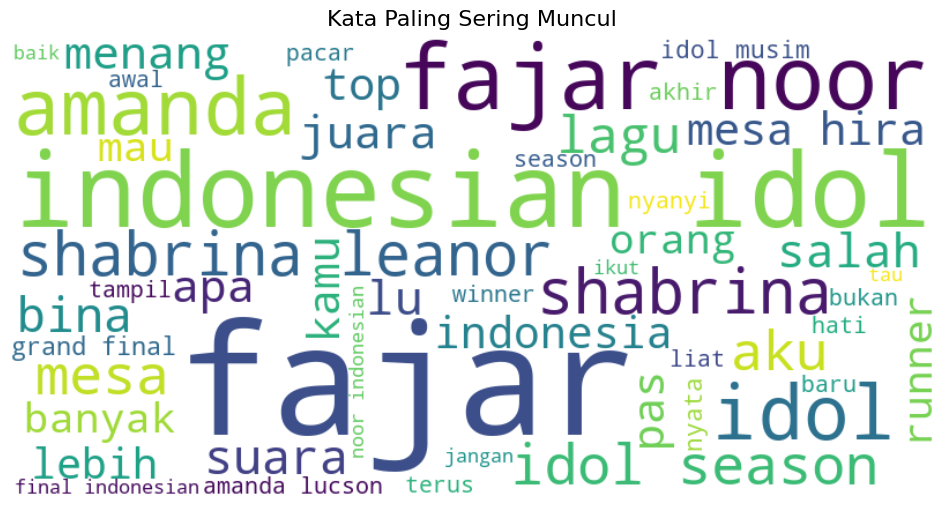

In [14]:
# Gabungkan semua teks hasil bersih jadi satu string
text_string = ' '.join(data['tweet_clean'])

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(text_string)

# Tampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Kata Paling Sering Muncul", fontsize=16)
plt.show()

In [39]:
for label in data['label_emosi'].unique():
    print(f"\nContoh untuk label: {label}")
    print(data[data['label_emosi'] == label]['tweet'].sample(3, random_state=42).values)


Contoh untuk label: Senang
['gw gak ngikutin idol kmren emg suara dia bagus ya pernah liat duetnya sm shabrina tu kebanting abiss kog bisa kek gitu juara2'
 'gara2 fajar noor indonesian idol nyanyiin menyesal suka bgt ga bosen jg muter bbrp kali dia nyanyiin itu'
 'indonesia idol punya finalists dua dua power kalau sorang menang sorang kalah pun tak penting sebab dua dua bagus final show dua dua nyanyi lagu almarhum glen fredly sampai judges nangis all the best shabrina amp fajar']

Contoh untuk label: Sedih
['amanda the only moment of confusion she zeudi had was with you jafar it was confusion it was letting go of something she didnt want she wanted helena amanda its too late now'
 'amici news da notizie giunte pi che attendibili vi confermo che elia stato eliminato ancora non so dirvi la modalit se tramite sfida o altri motivi'
 'exclusive and confirmed votings of bb13 finale 37 0 tu bhai khush reh']

Contoh untuk label: Marah
['gue gapernah ikut ikutan soal hujat artis kali ini faj

In [16]:
X = data["tweet_clean"]
y = data["label_emosi"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Tokenisasi

Tokenisasi dengan Bag of Words (BoW)

In [17]:
# Inisialisasi CountVectorizer
bow_vectorizer = CountVectorizer()

# Fit ke data latih, transform ke data latih dan uji
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

# Cek bentuk hasil
print("Shape BoW train:", X_train_bow.shape)
print("Shape BoW test :", X_test_bow.shape)

Shape BoW train: (731, 3128)
Shape BoW test : (183, 3128)


In [18]:
# Tampilkan bentuk vektornya
print(X_train_bow.toarray())  # Setiap baris = 1 dokumen/tweet

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Tokenisasi dengan TF-IDF

In [19]:
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [20]:
print(X_train_tfidf)

  (0, 2838)	0.2631568001132137
  (0, 492)	0.19535521849358878
  (0, 823)	0.07351500099163394
  (0, 1032)	0.25150472477651087
  (0, 884)	0.2105315423564258
  (0, 1921)	0.2631568001132137
  (0, 579)	0.22342997163504982
  (0, 440)	0.20700729383029162
  (0, 988)	0.21439191984178627
  (0, 89)	0.1077917178141126
  (0, 2660)	0.25150472477651087
  (0, 2876)	0.2631568001132137
  (0, 2088)	0.16989448889556705
  (0, 2964)	0.5263136002264274
  (0, 1890)	0.2631568001132137
  (0, 245)	0.22883843464220008
  (1, 823)	0.12132352896606662
  (1, 57)	0.2595006214629475
  (1, 3077)	0.20007421632447828
  (1, 1194)	0.0801214775087468
  (1, 1155)	0.062463056908912275
  (1, 2722)	0.15055635756501193
  (1, 748)	0.21714691716311216
  (1, 1746)	0.14019042825723482
  (1, 558)	0.16566250424631684
  :	:
  (730, 57)	0.12774397189678005
  (730, 1194)	0.07888255306292008
  (730, 1155)	0.061497185951813804
  (730, 2040)	0.131121804269641
  (730, 2359)	0.14029286180969008
  (730, 2942)	0.131121804269641
  (730, 353)	0.13

Pemodelan

MultinomialNB + TF-IDF

In [21]:
# 1. Inisialisasi model
nb = MultinomialNB()

# 2. Training
nb.fit(X_train_tfidf, y_train)

# 3. Prediksi
y_pred = nb.predict(X_test_tfidf)

# 4. Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6229508196721312

Classification Report:
               precision    recall  f1-score   support

       Marah       0.55      0.89      0.68        63
      Netral       0.67      0.20      0.31        10
       Sedih       1.00      0.16      0.27        38
      Senang       0.68      0.94      0.79        51
       Takut       1.00      0.10      0.17        21

    accuracy                           0.62       183
   macro avg       0.78      0.46      0.44       183
weighted avg       0.74      0.62      0.55       183



MultinomialNB + BoW

In [22]:
# Model
model = MultinomialNB()
model.fit(X_train_bow, y_train)

# Prediksi dan Evaluasi
y_pred = model.predict(X_test_bow)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6612021857923497
              precision    recall  f1-score   support

       Marah       0.72      0.84      0.77        63
      Netral       0.67      0.60      0.63        10
       Sedih       0.58      0.29      0.39        38
      Senang       0.63      0.94      0.76        51
       Takut       0.60      0.14      0.23        21

    accuracy                           0.66       183
   macro avg       0.64      0.56      0.56       183
weighted avg       0.65      0.66      0.62       183



SVC + TF-IDF

In [23]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7103825136612022

Classification Report:
               precision    recall  f1-score   support

       Marah       0.71      0.79      0.75        63
      Netral       0.67      0.80      0.73        10
       Sedih       0.55      0.42      0.48        38
      Senang       0.77      0.92      0.84        51
       Takut       0.82      0.43      0.56        21

    accuracy                           0.71       183
   macro avg       0.70      0.67      0.67       183
weighted avg       0.71      0.71      0.70       183



SVM + BoW

In [24]:
model = LinearSVC()
model.fit(X_train_bow, y_train)

y_pred = model.predict(X_test_bow)

# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6557377049180327

Classification Report:
               precision    recall  f1-score   support

       Marah       0.71      0.76      0.73        63
      Netral       0.47      0.80      0.59        10
       Sedih       0.50      0.39      0.44        38
      Senang       0.77      0.78      0.78        51
       Takut       0.56      0.43      0.49        21

    accuracy                           0.66       183
   macro avg       0.60      0.63      0.61       183
weighted avg       0.65      0.66      0.65       183



c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [31]:
from imblearn.over_sampling import SMOTE

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

# Vektorisasi
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(data['tweet_clean'])
y = data['label_emosi']

# Konversi ke array karena SMOTE tidak mendukung sparse matrix
X_array = X_tfidf.toarray()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=0.2, random_state=42)

# Model
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced')
}

# Training & Evaluasi
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    pipeline = Pipeline([
        ('smote', SMOTE(random_state=42)),
        ('clf', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


=== Logistic Regression ===


c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.6830601092896175
              precision    recall  f1-score   support

       Marah       0.77      0.73      0.75        63
      Netral       0.39      0.90      0.55        10
       Sedih       0.59      0.50      0.54        38
      Senang       0.81      0.82      0.82        51
       Takut       0.56      0.43      0.49        21

    accuracy                           0.68       183
   macro avg       0.62      0.68      0.63       183
weighted avg       0.70      0.68      0.68       183


=== Random Forest ===


c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Accuracy: 0.644808743169399
              precision    recall  f1-score   support

       Marah       0.78      0.68      0.73        63
      Netral       0.26      0.90      0.41        10
       Sedih       0.50      0.37      0.42        38
      Senang       0.79      0.86      0.82        51
       Takut       0.80      0.38      0.52        21

    accuracy                           0.64       183
   macro avg       0.63      0.64      0.58       183
weighted avg       0.70      0.64      0.65       183



In [36]:
!pip install xgboost

  Using cached xgboost-2.1.4-py3-none-win_amd64.whl (124.9 MB)


In [37]:
from xgboost import XGBClassifier

In [38]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# 2. Fitur dan target
X = data['tweet_clean']  # Kolom teks yang sudah dibersihkan
y = data['label_emosi'] # Label emosi (Sedih, Netral, Takut)

# 3. Encode label string jadi angka
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. TF-IDF vektorisasi
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(X)

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# 6. Pipeline: SMOTE + XGBoost
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
])

# 7. Fit model
pipeline.fit(X_train, y_train)

# 8. Prediksi
y_pred = pipeline.predict(X_test)

# 9. Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\ThinkPad\OneDrive\Documents\Miniconda\lib\site-packages\xgboost\core.py:158: UserWarning: [20:36:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6502732240437158

Classification Report:
              precision    recall  f1-score   support

       Marah       0.66      0.88      0.75        64
      Netral       0.62      0.53      0.57        15
       Sedih       0.48      0.38      0.42        37
      Senang       0.78      0.78      0.78        46
       Takut       0.50      0.24      0.32        21

    accuracy                           0.65       183
   macro avg       0.61      0.56      0.57       183
weighted avg       0.63      0.65      0.63       183

